<a href="https://colab.research.google.com/github/anshupandey/ms-generativeai-apr2025/blob/main/code11_SQL_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL Agent and SQL Chain

<img src="https://python.langchain.com/assets/images/sql_usecase-d432701261f05ab69b38576093718cf3.png">

In [ ]:
# Installing necessary libraries
!pip install langchain-openai langchain langchain-core langchain-community --quiet
!pip install httpx langchain-experimental ace_tools langgraph --quiet
!pip install openai google-search-results tiktoken wikipedia pyowm --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141

In [1]:
model_name="gpt-4o"

## Implementing a database Integration Chain

In [3]:
from langchain_openai import ChatOpenAI
from langchain.utilities import SQLDatabase
from langchain.chains import create_sql_query_chain


db = SQLDatabase.from_uri("sqlite:///Chinook_database.db")
llm = ChatOpenAI(model=model_name,temperature=0)
db_chain = create_sql_query_chain(llm, db)

In [5]:
db.run("select * from customer;")

'[(1, \'Luís\', \'Gonçalves\', \'Embraer - Empresa Brasileira de Aeronáutica S.A.\', \'Av. Brigadeiro Faria Lima, 2170\', \'São José dos Campos\', \'SP\', \'Brazil\', \'12227-000\', \'+55 (12) 3923-5555\', \'+55 (12) 3923-5566\', \'luisg@embraer.com.br\', 3), (2, \'Leonie\', \'Köhler\', None, \'Theodor-Heuss-Straße 34\', \'Stuttgart\', None, \'Germany\', \'70174\', \'+49 0711 2842222\', None, \'leonekohler@surfeu.de\', 5), (3, \'François\', \'Tremblay\', None, \'1498 rue Bélanger\', \'Montréal\', \'QC\', \'Canada\', \'H2G 1A7\', \'+1 (514) 721-4711\', None, \'ftremblay@gmail.com\', 3), (4, \'Bjørn\', \'Hansen\', None, \'Ullevålsveien 14\', \'Oslo\', None, \'Norway\', \'0171\', \'+47 22 44 22 22\', None, \'bjorn.hansen@yahoo.no\', 4), (5, \'František\', \'Wichterlová\', \'JetBrains s.r.o.\', \'Klanova 9/506\', \'Prague\', None, \'Czech Republic\', \'14700\', \'+420 2 4172 5555\', \'+420 2 4172 5555\', \'frantisekw@jetbrains.com\', 4), (6, \'Helena\', \'Holý\', None, \'Rilská 3174/6\', \

- Approach 1: input + prompt emplate (DB Schema) --> LLM ---> (outputs query)---> tool (DB tool to execute query) ---> LLM ---> Final Response

- Approach 2: input + user cred --> F0 ---> Fetch the DB schema based on accessible tables ---> Prompt template + DB schema ----> LLM ---> (outputs query)---> tool (DB tool to execute query) ---> LLM ---> Final Response

In [6]:
db.run("""SELECT "name" FROM sqlite_master WHERE "type"='table';""")

"[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]"

In [7]:
response = db_chain.invoke({"question":"What are tables in availabe in the database?"})
print(response)

Answer: The available tables in the database are "Album", "Artist", "Customer", "Employee", "Genre", "Invoice", "InvoiceLine", "MediaType", "Playlist", "PlaylistTrack", and "Track".


In [8]:
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool
exec_chain = QuerySQLDataBaseTool(db=db)

import re

def cleaner(query):
    pattern = re.compile(r"```(.*?)```",re.DOTALL)
    query = pattern.findall(query)[0]
    query = query[3:]
    query = query.replace("\n"," ")
    print(query)
    return query



final_Chain = db_chain | cleaner | exec_chain
final_Chain.invoke({"question":"What are tables in availabe in the database?"})

C:\Users\Admin\AppData\Local\Temp\ipykernel_10612\1818266462.py:2: LangChainDeprecationWarning: The class `QuerySQLDataBaseTool` was deprecated in LangChain 0.3.12 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-community package and should be used instead. To use it run `pip install -U :class:`~langchain-community` and import as `from :class:`~langchain_community.tools import QuerySQLDatabaseTool``.
  exec_chain = QuerySQLDataBaseTool(db=db)


 SELECT "name" FROM "sqlite_master" WHERE "type"='table'; 


"[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]"

In [12]:
final_Chain.invoke({"question":"How many employees are there in total?"})

 SQLQuery: SELECT COUNT("EmployeeId") AS "TotalEmployees" FROM "Employee" 


'Error: (sqlite3.OperationalError) near "SQLQuery": syntax error\n[SQL:  SQLQuery: SELECT COUNT("EmployeeId") AS "TotalEmployees" FROM "Employee" ]\n(Background on this error at: https://sqlalche.me/e/20/e3q8)'

In [13]:
final_Chain.invoke({"question":"who are most popular artists according to number of songs?"})

 SQLQuery:  SELECT "Artist"."Name", COUNT("Track"."TrackId") AS "NumberOfTracks" FROM "Artist" JOIN "Album" ON "Artist"."ArtistId" = "Album"."ArtistId" JOIN "Track" ON "Album"."AlbumId" = "Track"."AlbumId" GROUP BY "Artist"."Name" ORDER BY "NumberOfTracks" DESC LIMIT 5; 


'Error: (sqlite3.OperationalError) near "SQLQuery": syntax error\n[SQL:  SQLQuery:  SELECT "Artist"."Name", COUNT("Track"."TrackId") AS "NumberOfTracks" FROM "Artist" JOIN "Album" ON "Artist"."ArtistId" = "Album"."ArtistId" JOIN "Track" ON "Album"."AlbumId" = "Track"."AlbumId" GROUP BY "Artist"."Name" ORDER BY "NumberOfTracks" DESC LIMIT 5; ]\n(Background on this error at: https://sqlalche.me/e/20/e3q8)'

# SQL Agent

In [14]:
from langchain_community.agent_toolkits import create_sql_agent

agent_executor = create_sql_agent(llm, db=db, agent_type="openai-tools", verbose=True)

In [15]:
agent_executor.invoke({"input": "what's the average age of customers"})



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_list_tables` with `{}`


Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
Invoking: `sql_db_schema` with `{'table_names': 'Customer'}`



CREATE TABLE "Customer" (
	"CustomerId" INTEGER NOT NULL, 
	"FirstName" NVARCHAR(40) NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Company" NVARCHAR(80), 
	"Address" NVARCHAR(70), 
	"City" NVARCHAR(40), 
	"State" NVARCHAR(40), 
	"Country" NVARCHAR(40), 
	"PostalCode" NVARCHAR(10), 
	"Phone" NVARCHAR(24), 
	"Fax" NVARCHAR(24), 
	"Email" NVARCHAR(60) NOT NULL, 
	"SupportRepId" INTEGER, 
	PRIMARY KEY ("CustomerId"), 
	FOREIGN KEY("SupportRepId") REFERENCES "Employee" ("EmployeeId")
)

/*
3 rows from Customer table:
CustomerId	FirstName	LastName	Company	Address	City	State	Country	PostalCode	Phone	Fax	Email	SupportRepId
1	Luís	Gonçalves	Embraer - Empresa Brasileira de Aeronáutica S.A.	Av. Brigadeiro Faria Lima, 2170	São José dos Camp

{'input': "what's the average age of customers",
 'output': 'The "Customer" table does not have a column for age or date of birth, so I cannot calculate the average age of customers. If you have any other questions related to the database, feel free to ask!'}

In [16]:
agent_executor.invoke({"input": "what are the countries from where we have customers, provide unique list with count"})



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_list_tables` with `{}`


Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
Invoking: `sql_db_schema` with `{'table_names': 'Customer'}`



CREATE TABLE "Customer" (
	"CustomerId" INTEGER NOT NULL, 
	"FirstName" NVARCHAR(40) NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Company" NVARCHAR(80), 
	"Address" NVARCHAR(70), 
	"City" NVARCHAR(40), 
	"State" NVARCHAR(40), 
	"Country" NVARCHAR(40), 
	"PostalCode" NVARCHAR(10), 
	"Phone" NVARCHAR(24), 
	"Fax" NVARCHAR(24), 
	"Email" NVARCHAR(60) NOT NULL, 
	"SupportRepId" INTEGER, 
	PRIMARY KEY ("CustomerId"), 
	FOREIGN KEY("SupportRepId") REFERENCES "Employee" ("EmployeeId")
)

/*
3 rows from Customer table:
CustomerId	FirstName	LastName	Company	Address	City	State	Country	PostalCode	Phone	Fax	Email	SupportRepId
1	Luís	Gonçalves	Embraer - Empresa Brasileira de Aeronáutica S.A.	Av. Brigadeiro Faria Lima, 2170	São José dos Camp

{'input': 'what are the countries from where we have customers, provide unique list with count',
 'output': 'Here is a unique list of countries from where we have customers, along with the count of customers from each country:\n\n- Argentina: 1\n- Australia: 1\n- Austria: 1\n- Belgium: 1\n- Brazil: 5\n- Canada: 8\n- Chile: 1\n- Czech Republic: 2\n- Denmark: 1\n- Finland: 1\n- France: 5\n- Germany: 4\n- Hungary: 1\n- India: 2\n- Ireland: 1\n- Italy: 1\n- Netherlands: 1\n- Norway: 1\n- Poland: 1\n- Portugal: 2\n- Spain: 1\n- Sweden: 1\n- USA: 13\n- United Kingdom: 3'}

In [17]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm)

tools = toolkit.get_tools()

tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000028EC28596A0>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000028EC28596A0>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000028EC28596A0>),
 QuerySQLCheckerTool(description='Use this tool to 

In [18]:
from langchain_core.messages import HumanMessage
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, tools,) #messages_modifier=system_message

In [19]:
for s in agent_executor.stream(
    {"messages": [HumanMessage(content="Which country's customers spent the most?")]}
):
    print(s)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_OQtlmBnDsY8z0QnKdWEjBwTy', 'function': {'arguments': '{}', 'name': 'sql_db_list_tables'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 325, 'total_tokens': 338, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_726d488742', 'id': 'chatcmpl-BIVoVl9z0HNT5R4HLEuyaRtjxl70Q', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-55a85115-d639-4f45-b181-ef53e6218898-0', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'call_OQtlmBnDsY8z0QnKdWEjBwTy', 'type': 'tool_call'}], usage_metadata={'input_tokens': 325, 'output_tokens': 13, 'total_tokens': 338, 'input_token_details': {'audio': 0, 'cache_read': 0

In [21]:
from langchain_core.tools import tool

@tool
def generate_python_code_for_graph(data:str, chart_type:str):
    """ THis function can be used to generate python code to plot any chart, given the data.
    Use this once the data to be plotted is available either provided by user or data coming from sql query result.

    Provide the data as python list / dict in string format and chart_typ, e.g. bar, pie etc.
    """
    prompt = f""" you are an expert python programmer, write python code to generate {chart_type} for the 
    data: {data}  Keep the code clean, so not write any other expalanation, the code should be executed by exec() in python directly.
    provide the code as string without any other text. Use libraries like pandas, numpy, matplotlib and seaborn only."""
    output = llm.invoke(prompt)
    return output

@tool
def check_python_code(code:str):
    """ This funciton can be used to check quality of a python code and clean it.
    it is to be used after generate_python_code_for_graph and before execute_python_code. """
    prompt = f""" for the provided code remove any extra string, triple backticks or any dditional text to make it possible 
    to execute using exec() function, do not change the code. code: {code}"""
    output = llm.invoke(prompt)
    return output

@tool
def execute_python_code(code:str):
    """this function executes any python clean code, use it after check_python_code. expects code in string as input."""
    exec(code)
    return "code executed successfully"


In [22]:
tools.extend([generate_python_code_for_graph,check_python_code,execute_python_code])
tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000028EC28596A0>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000028EC28596A0>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x0000028EC28596A0>),
 QuerySQLCheckerTool(description='Use this tool to 

In [23]:
agent_executor = create_react_agent(llm, tools,)
for s in agent_executor.stream(
    {"messages": [HumanMessage(content="Which country's customers spent the most?")]}
):
    print(s)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mN15bk1CAd5ZITeLnFTNVMMM', 'function': {'arguments': '{}', 'name': 'sql_db_list_tables'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 497, 'total_tokens': 510, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_726d488742', 'id': 'chatcmpl-BIWEYFLOC0sgcvR6pbYTDQlLR3I5a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a084a9de-76e8-402f-94ab-7f348a71a669-0', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'call_mN15bk1CAd5ZITeLnFTNVMMM', 'type': 'tool_call'}], usage_metadata={'input_tokens': 497, 'output_tokens': 13, 'total_tokens': 510, 'input_token_details': {'audio': 0, 'cache_read': 0

In [ ]:
!pip install matplotlib seaborn plotly --quiet

^C


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Sse9vr65stFxk4RNK5292802', 'function': {'arguments': '{}', 'name': 'sql_db_list_tables'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 510, 'total_tokens': 523, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_726d488742', 'id': 'chatcmpl-BIWN0Y9gpKwIrBbQ82nWGY3vXOax6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-697c15a0-db84-4539-9529-ef200669cf9c-0', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'call_Sse9vr65stFxk4RNK5292802', 'type': 'tool_call'}], usage_metadata={'input_tokens': 510, 'output_tokens': 13, 'total_tokens': 523, 'input_token_details': {'audio': 0, 'cache_read': 0

<string>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



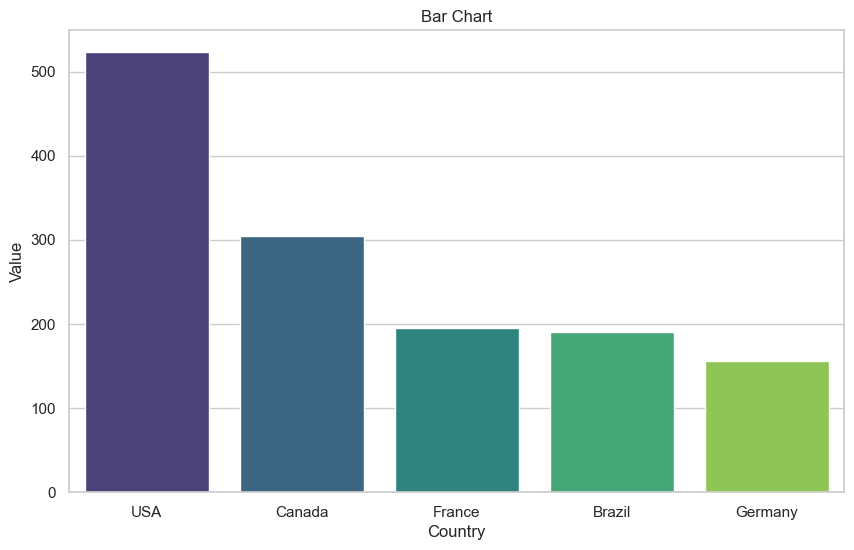

{'tools': {'messages': [ToolMessage(content='code executed successfully', name='execute_python_code', id='0ba180f1-6cff-4aa8-aa6c-1a0cb3c4cc24', tool_call_id='call_8Q9pmc6ZllRuFFUGpHvk1oVS')]}}
----
{'agent': {'messages': [AIMessage(content='The top 5 countries with the highest spending customers are as follows:\n\n1. USA: $523.06\n2. Canada: $303.96\n3. France: $195.10\n4. Brazil: $190.10\n5. Germany: $156.48\n\nThe bar chart visualizing this data has been successfully generated.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 2759, 'total_tokens': 2832, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 2688}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_726d488742', 'id': 'chatcmpl-BIWNUfZfI7LyoxN8Nw6c3dnQTNucY', 'finish_reason': 'stop', 'logprobs': No

In [28]:
for s in agent_executor.stream(
    {"messages": [HumanMessage(content="which 5 countries customers are most spenders, provide data with value and plot a bar chart.")]}
):
    print(s)
    print("----")

In [ ]:
#

## Thank You